<a href="https://colab.research.google.com/github/20144481NguyenMinhTruong/NguyenMinhTruong20144481/blob/main/NHANDIENKHUONMAT_NguyenMinhTruong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
# Chuyển đến file Google Drive chứa bộ ảnh đã tạo
%cd /content/drive/MyDrive/NHANDIENKHUONMAT/nhandienkhuonmat

/content/drive/MyDrive/NHANDIENKHUONMAT/nhandienkhuonmat


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [6]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/NHANDIENKHUONMAT/TRAIN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 100 images belonging to 2 classes.


In [7]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'CO': 0, 'KO': 1}

In [8]:
# Tạo ra dữ liệu đầu vào và đầu ra từ bộ dữ liệu training set
x_train,y_train=next(training_set)

In [9]:
x_train.shape

(32, 150, 150, 3)

In [10]:
y_train.shape

(32, 2)

In [11]:
# Xử lý dữ liệu training
x_train=x_train.reshape(32,67500)
x_train=x_train.astype ('float32')
x_train=x_train/255

In [12]:
x_train.shape

(32, 67500)

In [13]:
y_train.shape

(32, 2)

In [16]:
# Tạo ra mạng ANN để train mô hình
model=Sequential()
# Tạo lớp ẩn thứ nhất với 67500 tín hiệu vào và có 4 tín hiệu ra sử dụng hàm relu
model.add(Dense(4,activation='relu',input_shape=(67500,)))
# Tạo lớp ẩn thứ hai với 4 tín hiệu vào và có 50 tín hiệu ra sử dụng hàm relu
model.add(Dense(50,activation='relu'))
# Tạo lớp ẩn thứ ba với 50 tín hiệu vào và có 50 tín hiệu ra sử dụng hàm relu
model.add(Dense(50,activation='relu'))
# Tạo lớp ẩn thứ tư với 50 tín hiệu vào, 2 tín hiệu ra ra sử dụng hàm softmax
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 270004    
                                                                 
 dense_1 (Dense)             (None, 50)                250       
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 272,906
Trainable params: 272,906
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Biên dịch 
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=["accuracy"])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣10 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(x_train,y_train,epochs=500, batch_size=10,verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/500
3/3 [==============================] - 1s 114ms/step - loss: 0.6845 - accuracy: 0.6400 - val_loss: 0.7185 - val_accuracy: 0.4286
Epoch 2/500
3/3 [==============================] - 0s 20ms/step - loss: 0.6412 - accuracy: 0.6400 - val_loss: 0.7738 - val_accuracy: 0.4286
Epoch 3/500
3/3 [==============================] - 0s 19ms/step - loss: 0.6160 - accuracy: 0.6400 - val_loss: 0.7083 - val_accuracy: 0.4286
Epoch 4/500
3/3 [==============================] - 0s 18ms/step - loss: 0.5977 - accuracy: 0.6400 - val_loss: 0.7342 - val_accuracy: 0.4286
Epoch 5/500
3/3 [==============================] - 0s 21ms/step - loss: 0.5793 - accuracy: 0.6400 - val_loss: 0.6978 - val_accuracy: 0.4286
Epoch 6/500
3/3 [==============================] - 0s 18ms/step - loss: 0.5789 - accuracy: 0.6400 - val_loss: 0.6529 - val_accuracy: 0.4286
Epoch 7/500
3/3 [==============================] - 0s 19ms/step - loss: 0.5409 - accuracy: 0.6400 - val_loss: 0.6655 - val_accuracy: 0.4286
Epoch 8/500
3/3 [==

In [18]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(x_train,y_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 3.7252898543727042e-09
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

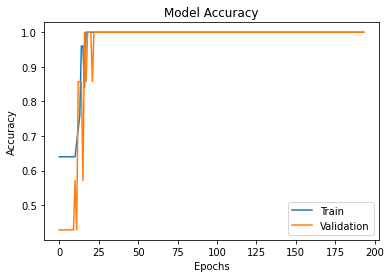

In [19]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [20]:
# Lưu lại
model.save("Nhan_dien_khuon_mat.h5")

In [21]:
# Tải mô hình 
model_ANN=load_model('Nhan_dien_khuon_mat.h5')

1/1 [==============================] - 0s 86ms/step
CO TRUONG


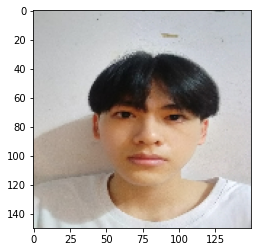

In [23]:
# Kiểm tra các hình có trong bộ dữ liệu test_set
img=load_img('/content/drive/MyDrive/NHANDIENKHUONMAT/TEST/TRUONGT1.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,67500)
img=img.astype('float32')
img=img/255
result=np.argmax(model_ANN.predict(img),axis=1)
if result==0:
  prediction="CO TRUONG"
if result==1:
  prediction="KHONG CO TRUONG"
print(prediction)

1/1 [==============================] - 0s 19ms/step
CO TRUONG


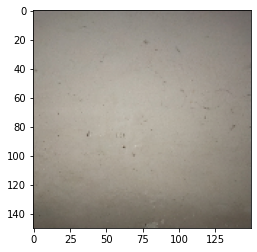

In [25]:
# Kiểm tra các hình có trong bộ dữ liệu test_set
img=load_img('/content/drive/MyDrive/NHANDIENKHUONMAT/TEST/KH1.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,67500)
img=img.astype('float32')
img=img/255
result=np.argmax(model_ANN.predict(img),axis=1)
if result==0:
  prediction="CO TRUONG"
if result==1:
  prediction="KHONG CO TRUONG"
print(prediction)